<a href="https://colab.research.google.com/github/JasonKeha/Machine_Learning-ML-/blob/main/California_Housing_Prices_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **California Housing Prices**

*Original dataset:* (https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### Importing the necessary libraries

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Connecting to our dataset

API Details

Username : itsjasonk

Key : 0fdaa64cb05419c3c1403b05d9aec00d

In [ ]:
od.download('https://www.kaggle.com/datasets/camnugent/california-housing-prices')

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Checking our columns

In [ ]:
print("The columns are:", list(df.columns))
print("The number of columns is:", len(df.columns))

The columns are: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
The number of columns is: 10


About our data:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

### Checking our shapes and datatypes

In [ ]:
print('The shape is:', df.shape)
print(f'The datatypes are:\n{df.dtypes}')
# The datatypes seem ok 

The shape is: (20640, 10)
The datatypes are:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


### Finding our missing data

In [ ]:
empty_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([empty_values, percentage], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(len(df.columns))
# There are missing data only from a column

,Total,Percent
total_bedrooms,207,0.010029
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


### Filling our missing values with the column's median values

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

### Removing the duplicated rows

In [ ]:
print('The shape is', df.shape)
df.drop_duplicates()
print('The shape after removing the duplicated rows is', df.shape)
# Our dataset has no duplicates

The shape is (20640, 10)
The shape after removing the duplicated rows is (20640, 10)


### Checking the 'ocean_proximity' column before updating it for machine learning

In [ ]:
fig = px.histogram(df, x='ocean_proximity')
fig.update_layout(yaxis_title='Frequency')
fig.show()

### As we can clearly see, the ISLAND values are outliers, so let's drop them

In [ ]:
df = df[df['ocean_proximity'] != 'ISLAND']

### Updating the ocean_proximity column for machine learning

In [ ]:
df = pd.get_dummies(df, columns = ["ocean_proximity"])

In [ ]:
df.head()
# Everything seems alright

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### Importing the necessary libraries for machine learning

In [ ]:
import keras
from keras.optimizers import Adam
from keras.losses import mean_squared_error
from keras.metrics import RootMeanSquaredError
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Standardizing all of our features

In [ ]:
scale=StandardScaler()
columns_list = df.columns.tolist()
df[columns_list] = scale.fit_transform(np.array(df[columns_list]))

### Creating the input and the output variables

In [ ]:
x = df[columns_list[:-1]]
y = df[columns_list[-1]]

### Splitting our dataset to train/test datasets

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=5)
print(f'xtrain shape: {xtrain.shape}, ytrain shape: {ytrain.shape}')
print(f'xtest shape: {xtest.shape}, ytest shape: {ytest.shape}')

xtrain shape: (14444, 12), ytrain shape: (14444,)
xtest shape: (6191, 12), ytest shape: (6191,)


### Creating our machine learning model

In [ ]:
model = Sequential()
model.add(Dense(activation="relu", input_dim=xtrain.shape[1], units=xtrain.shape[1], kernel_initializer="uniform"))
model.add(Dense(activation="tanh", units=150, kernel_initializer="uniform"))
model.add(Dropout(0.5))
model.add(Dense(activation="relu", units=100, kernel_initializer="uniform"))
model.add(Dropout(0.5))
model.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))
model.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))
model.add(Dense(activation="relu", units=1, kernel_initializer="uniform"))

### Compiling our model and checking our summary

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=mean_squared_error, 
      metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                156       
                                                                 
 dense_19 (Dense)            (None, 150)               1950      
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               15100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 50)               

### Training our model

In [ ]:
history = model.fit(xtrain, ytrain, batch_size = 200, epochs = 50, validation_split=0.2, verbose = 2, shuffle=True)

Epoch 1/50
58/58 - 0s - loss: 0.1300 - root_mean_squared_error: 0.3605 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3598 - 417ms/epoch - 7ms/step
Epoch 2/50
58/58 - 0s - loss: 0.1294 - root_mean_squared_error: 0.3597 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3598 - 410ms/epoch - 7ms/step
Epoch 3/50
58/58 - 0s - loss: 0.1294 - root_mean_squared_error: 0.3597 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3598 - 376ms/epoch - 6ms/step
Epoch 4/50
58/58 - 0s - loss: 0.1294 - root_mean_squared_error: 0.3597 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3598 - 410ms/epoch - 7ms/step
Epoch 5/50
58/58 - 0s - loss: 0.1294 - root_mean_squared_error: 0.3597 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3598 - 403ms/epoch - 7ms/step
Epoch 6/50
58/58 - 0s - loss: 0.1294 - root_mean_squared_error: 0.3597 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3598 - 387ms/epoch - 7ms/step
Epoch 7/50
58/58 - 0s - loss: 0.1294 - root_mean_squared_error: 0.3597 - val_loss:

### Plotting our model's improvement

In [ ]:
# Getting the training and validation loss values
loss = history.history['root_mean_squared_error']
val_loss = history.history['val_root_mean_squared_error']

# Setting the style of the plot
sns.set_style('darkgrid')

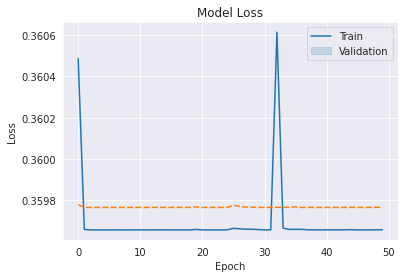

In [ ]:
# Plotting the training and validation accuracy values
sns.lineplot(data=[loss, val_loss])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Testing our model

In [ ]:
history = model.fit(xtest, ytest, batch_size = 200, epochs = 50, validation_split=0.2, verbose = 2, shuffle=True)

### Plotting our model's improvement

In [ ]:
# Getting the testing and validation loss values
loss = history.history['root_mean_squared_error']
val_loss = history.history['val_root_mean_squared_error']

# Setting the style of the plot
sns.set_style('darkgrid')

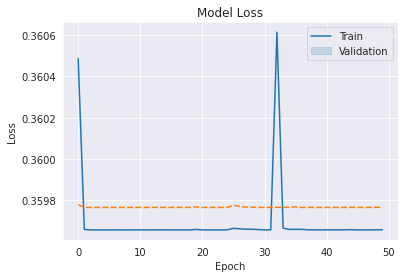

In [ ]:
# Plotting the testing and validation accuracy values
sns.lineplot(data=[loss, val_loss])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Our model seems to be doing ok, however there's **huge** room for improvement

## Using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### Applying our new_model

In [ ]:
my_new_model = RandomForestRegressor()
my_new_model.fit(xtrain, ytrain)

In [ ]:
my_new_model.score(xtrain, ytrain)

0.9999763319223766

### Testing our model

In [ ]:
output = my_new_model.predict(xtest)
my_new_model.score(xtest, ytest)

0.9998802311276663

## **As we can clearly see RandomForestRegressor fits our dataset far better than the typical linear regressor model**